In [284]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/american-sign-language/American_sign_language.jpg


# SIGN LANGUAGE DETECTION USING NEURAL NETWORKS (KERAS)

## Importing Libraries

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None 

from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [286]:
train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

## Data Exploration

In [287]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [288]:
train.shape

(27455, 785)

In [289]:
unique_labels = sorted(train['label'].unique())
print(unique_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


The dataset consists of 785 columns.  
* 1 for label having values from 0 to 25 indicating a number for each letter in alphabets 
  except **9 = J** and **25 = Z** Which requires gesture motion so 24 unique labels.
* Since, the images are 28\*28 pixel resolution, we have 784 columns representing one of the **values(0-255)** from grayscale gradient for each pixel.

Text(0.5, 0, 'Labels')

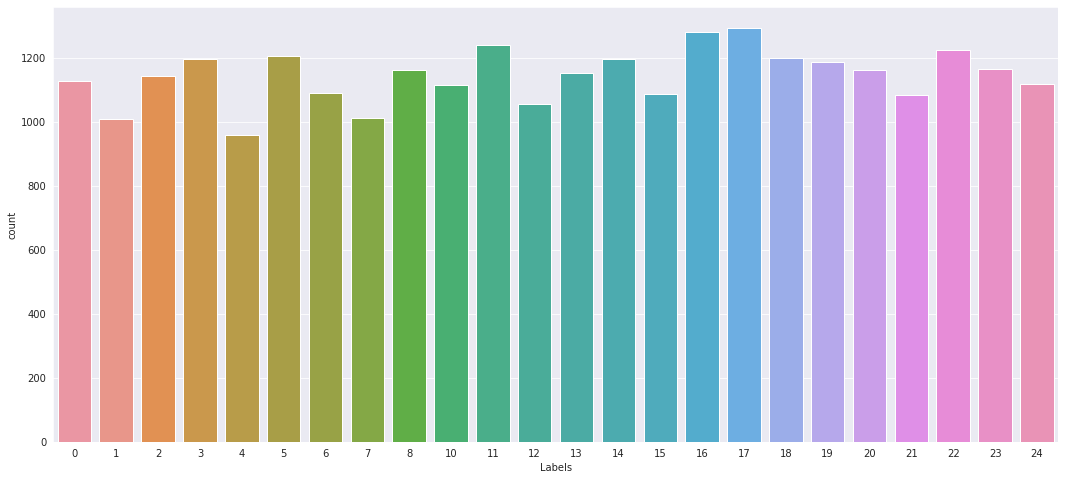

In [290]:
plt.figure(figsize = (18,8))
sns.countplot(x = train['label'])
plt.xlabel('Labels')

We have enough samples for each unique label value

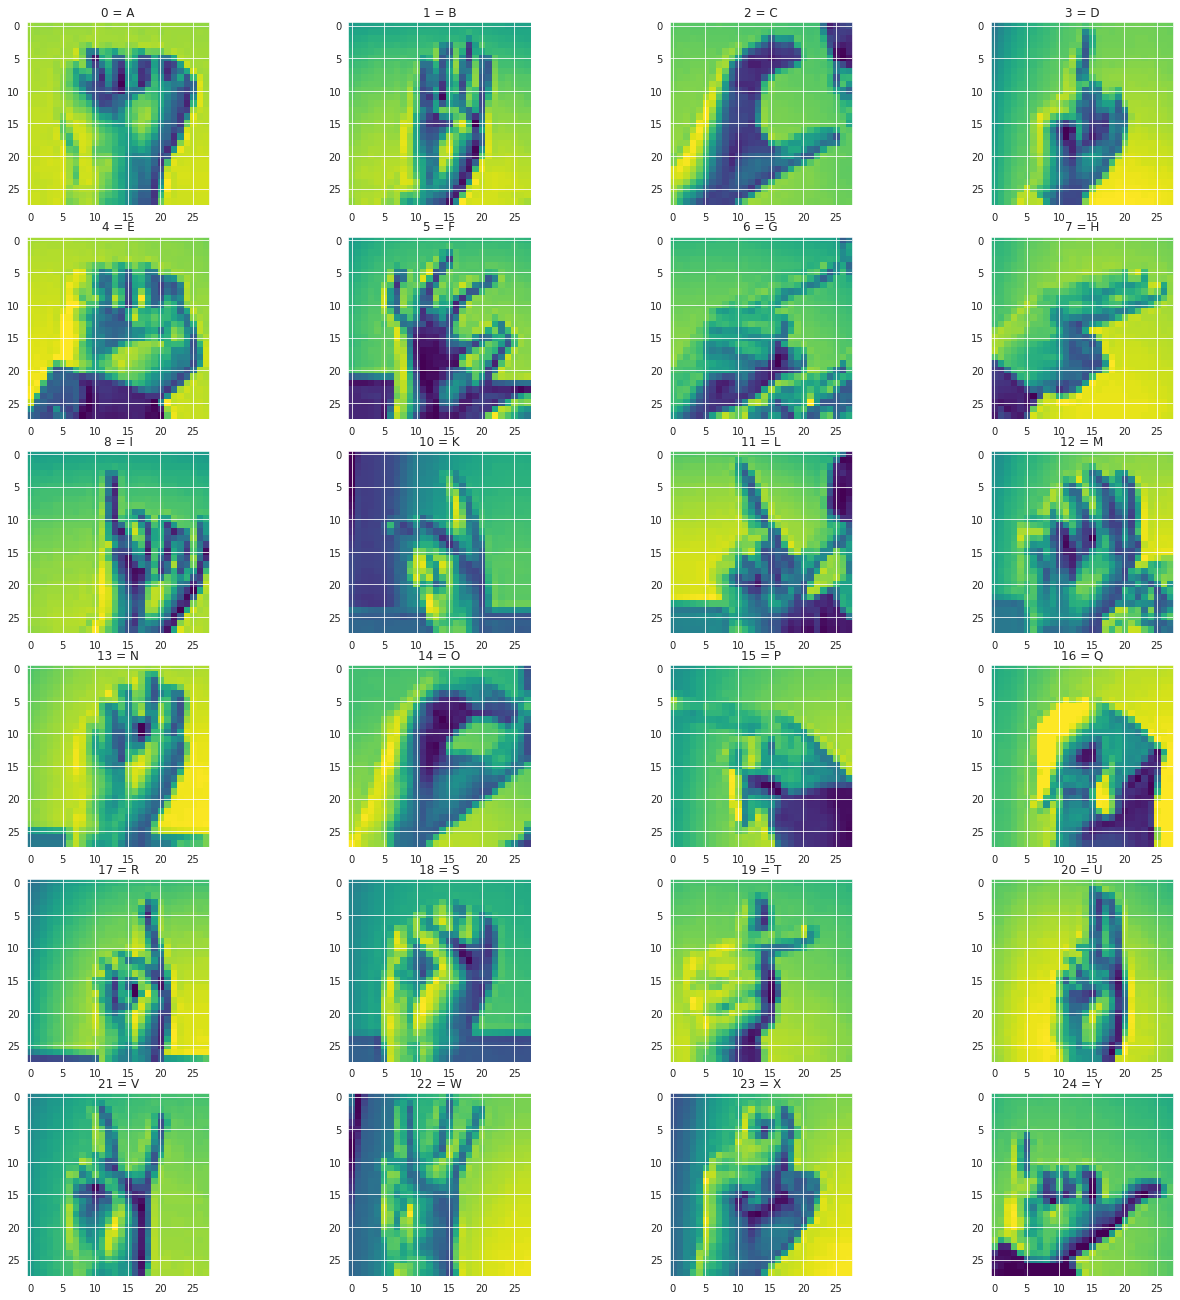

In [291]:
#Lets build a function that constructs the image for a desired label. We will visualize all the 24 unique labels present
fig,ax=plt.subplots(6,4,figsize=(18,18))

def image_builder(label,axes,row,column):
    image = train[train['label']==label].iloc[0] #retrieves the first instance of the given label from dataset
    image = image[1:] #dropping the label value
    image = image.values #returns list of 784 pixels
    image = np.reshape(image,(28,28)) #constructing matrix of 28*28
    
    axes[row,column].imshow(image,cmap=plt.cm.viridis)
    
    alphabets = list(string.ascii_uppercase)
    title = str(label) + ' = ' + alphabets[label]
    axes[row,column].set_title(title)#what number corresponds what hand sign and alphabet
    
fig.tight_layout()

i = 0 #starting from 0th label
for r in range(6): #row
    for c in range(4): #column
        image_builder(i,ax,r,c)
        i=i+1 #iterate to next label
        if i==9: #no image for label 9 since it is not in dataset
            i=i+1 #skipping 9
            

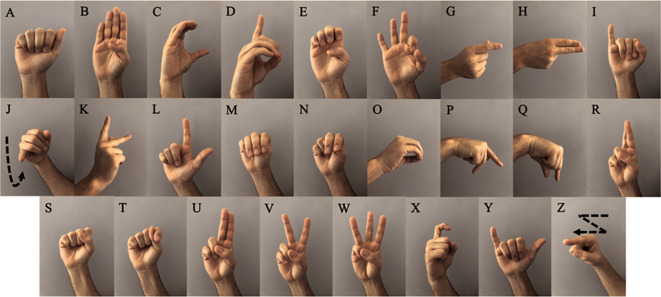

In [292]:
Image('/kaggle/input/american-sign-language/American_sign_language.jpg')

Image credits: https://www.sciencedirect.com/topics/medicine-and-dentistry/american-sign-language

## Training and Testing parameters

In [293]:
train_y = train['label'].values
test_y = test['label'].values

In [294]:
train = train.drop('label',axis=1)
test = test.drop('label',axis=1)
train_x = train.values
test_x = test.values

In [295]:
train_x

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [296]:
train_y

array([ 3,  6,  2, ..., 18, 17, 23])

**Note**
* As it can be seen, each image is a 1D array of 784 pixel values
* In order to feed it to neural network, we need a 2\*2 array, which we can achieve with reshape() function
* Another concern is that labels need to be in binary format

## Preparing Data

Since there are 24 numerical categories(labels) we need to binarize the data with LabelBinarizer.

In [297]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_y = label_binarizer.fit_transform(train_y)
test_y = label_binarizer.fit_transform(test_y)

Normalizing the Data

In [298]:
train_x = train_x / 255
test_x = test_x / 255

Reshaping the data to feed the NN

In [299]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

## Building the model

In [300]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout

In [301]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(24, activation = 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)              

In [302]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [303]:
history = model.fit(train_x,train_y, validation_data = (test_x, test_y), epochs=15, batch_size=128)

Epoch 1/15
215/215 [==============================] - 17s 76ms/step - loss: 2.1682 - accuracy: 0.3256 - val_loss: 1.1435 - val_accuracy: 0.6368
Epoch 2/15
215/215 [==============================] - 17s 77ms/step - loss: 0.7372 - accuracy: 0.7513 - val_loss: 0.6463 - val_accuracy: 0.7764
Epoch 3/15
215/215 [==============================] - 16s 74ms/step - loss: 0.3532 - accuracy: 0.8844 - val_loss: 0.5229 - val_accuracy: 0.8427
Epoch 4/15
215/215 [==============================] - 15s 69ms/step - loss: 0.1949 - accuracy: 0.9390 - val_loss: 0.4619 - val_accuracy: 0.8394
Epoch 5/15
215/215 [==============================] - 16s 73ms/step - loss: 0.1134 - accuracy: 0.9660 - val_loss: 0.3997 - val_accuracy: 0.8816
Epoch 6/15
215/215 [==============================] - 15s 70ms/step - loss: 0.0715 - accuracy: 0.9798 - val_loss: 0.3899 - val_accuracy: 0.8806
Epoch 7/15
215/215 [==============================] - 16s 75ms/step - loss: 0.0484 - accuracy: 0.9874 - val_loss: 0.3904 - val_accuracy:

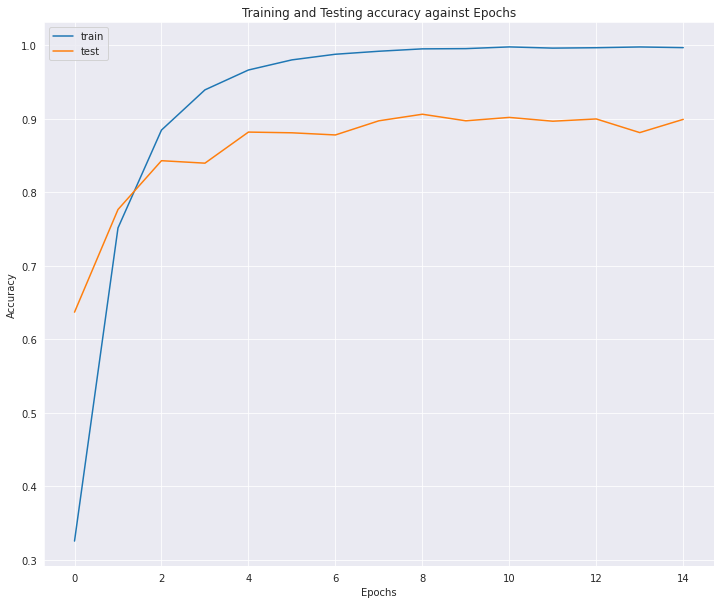

In [304]:
fig, ax = plt.subplots(figsize=(12,10))

sns.lineplot(data=history.history['accuracy'],ax=ax)
sns.lineplot(data=history.history['val_accuracy'],ax=ax)
ax.set_title("Training and Testing accuracy against Epochs")
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend(['train','test'])

## Prediction

In [305]:
y_pred = model.predict(test_x)

In [306]:
accuracy_score(test_y,y_pred.round())

0.8958449525934189

## Conclusion

* The accuracy score shows that we have almost 90% accurate model.  
* The layers of Deep Neural Network can be changed along with number of Neurons in each layer to get more accurate model.
